In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
folder = r"data\sensitivity"

In [3]:
def normalization(df, var):

    xmin = df[var].min()
    xmax = df[var].max()

    norm = df[var].apply(lambda x: (x-xmin)/(xmax - xmin))
    return norm

## Agriculture as Main Job

In [ ]:
rural_agriculture = pd.read_excel(fr'{folder}\farmers_by_village.xlsx') # number of villages with agriculture as the main sector
total_villages = pd.read_excel(fr'{folder}\number_of_village.xlsx')

In [5]:
total_villages = total_villages.rename(columns={'Provinsi':'Province','Jumlah Desa':'Total Villages'})

In [6]:
rural = pd.merge(left=total_villages, right=rural_agriculture, on='Province')

In [7]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kepulauan Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'DKI Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'DI Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}


region_map = {
    'Aceh': 'Sumatera',
    'Sumatera Utara': 'Sumatera',
    'Sumatera Barat': 'Sumatera',
    'Riau': 'Sumatera',
    'Kepulauan Riau': 'Sumatera',
    'Jambi': 'Sumatera',
    'Sumatera Selatan': 'Sumatera',
    'Bangka Belitung':'Sumatera',
    'Bengkulu': 'Sumatera',
    'Lampung': 'Sumatera',
    'DKI Jakarta':'Jawa',
    'Jawa Barat': 'Jawa',
    'Banten': 'Jawa',
    'Jawa Tengah': 'Jawa',
    'DI Yogyakarta': 'Jawa',
    'Jawa Timur': 'Jawa',
    'Bali': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Barat': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Timur': 'Bali-Nusa Tenggara',
    'Kalimantan Barat': 'Kalimantan',
    'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan',
    'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Utara': 'Kalimantan',
    'Sulawesi Utara': 'Sulawesi',
    'Gorontalo': 'Sulawesi',
    'Sulawesi Tengah': 'Sulawesi',
    'Sulawesi Barat': 'Sulawesi',
    'Sulawesi Selatan': 'Sulawesi',
    'Sulawesi Tenggara': 'Sulawesi',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku',
    'Papua Barat': 'Papua',
    'Papua': 'Papua',
}

In [8]:
rural['Province'] = rural['Province'].apply(lambda x: province_map[x] 
                                            if x in province_map.keys()
                                            else x)
rural = rural.groupby(['Province']).sum().reset_index()
rural.loc[:, 'Dependency on Agriculture (%)'] = rural['Total'] / rural['Total Villages'] * 100 #/ np.sum(rural['Total'])

In [ ]:
S1 = rural.copy()
S1['S1'] = normalization(S1, 'Dependency on Agriculture (%)')
S1.to_csv('data\processed\S1_AgricultureDependency.csv', index=False)

In [14]:
S1 = S1[['Province', 'Dependency on Agriculture (%)']]

In [12]:
S1 = S1[['Province', 'S1']]

## Farmer by Business Type

In [ ]:
business = pd.read_csv(fr'{folder}\farmer_by_business.csv')

# calculate percentage of individual and groups farmer
business.loc[:, 'Individual (%)'] = business['Individual'] / business['Total(2023)'] * 100
business['Groups (%)'] = (business['Group'] + business['Company']) / business['Total(2023)'] * 100

In [ ]:
folder2 = r"data\exposure\agriculture_area"

area = pd.read_csv(fr'{folder2}\total_area_and_number_of_island.csv')

area = area.rename(columns={'Provinsi':'Province', 'Luas Wilayah (Km2)':'Total Area (km2)'})
# area = area.drop(columns=['Ibu Kota Wilayah', 'Persentase Terhadap Luas Wilayah', 'Jumlah Pulau'])

# agriculture land data
dry_fields = pd.read_csv(fr'{folder2}\dry_fields.csv')
garden_fields = pd.read_csv(fr'{folder2}\garden_fields.csv')
# unused_land = pd.read_csv(fr'{folder2}\unused_lands.csv')
wetlands = pd.read_csv(fr'{folder2}\wetlands.csv')
# wetlands_non_irr = pd.read_csv(fr'{folder2}\wetlands_non-irrigated.csv')
# wetlands_irr = pd.read_csv(fr'{folder2}\wetlands_irrigated.csv')

In [25]:
# Standardize the column
columns_ag_area = ['Provinsi', '2015', '2016', '2017', '2018', '2019']

dry_fields = dry_fields[columns_ag_area]
garden_fields = garden_fields[columns_ag_area]
wetlands = wetlands[columns_ag_area]

# unused_land = unused_land[columns_ag_area]
# wetlands_irr = wetlands_irr[columns_ag_area]
# wetlands_non_irr = wetlands_non_irr[columns_ag_area]

In [26]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kepulauan Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'DKI Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'DI Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}
area['Province'] = area['Province'].apply(lambda x: province_map[x])

area = area.groupby(['Province']).sum().reset_index()
area = area[['Province', 'Total Area (km2)']]
area = area.groupby(['Province']).sum()

ag_land = pd.concat([dry_fields, garden_fields, wetlands]).rename(columns={'Provinsi':'Province'})

In [27]:
import pandas as pd

# Example: group by Province
agg_funcs = {}

for col in ag_land.columns:
    if col == 'Province':
        continue  # skip the grouping column itself
    if pd.api.types.is_numeric_dtype(ag_land[col]):
        agg_funcs[col] = 'sum'
    else:
        agg_funcs[col] = lambda x: ', '.join(x.astype(str))  # concatenate strings

ag_land = ag_land.groupby('Province').agg(agg_funcs).reset_index()

In [28]:
df = pd.merge(business, ag_land, on='Province')

In [29]:
df['Farmer per Ha'] = df['Individual'] / df[[str(c) for c in range(2015, 2020)]].mean(axis=1)

In [30]:
df['S3'] = normalization(df, 'Farmer per Ha')

In [ ]:
df.to_csv(r'data\processed\S3_SmallholderPrevalence.csv', index=False)

In [ ]:
# business.loc[:, 'Normalized Individual (%)'] = normalization(business, 'Individual (%)')

In [22]:
S3 = df[['Province', 'S3']]

## Agricultural Contribution to GDP

In [33]:
province_map = {
    'Aceh': 'Aceh',
    'Sumatera Utara': 'Sumatera Utara',
    'Sumatera Barat': 'Sumatera Barat',
    'Riau': 'Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Jambi': 'Jambi',
    'Sumatera Selatan': 'Sumatera Selatan',
    'Kep. Bangka Belitung': 'Bangka Belitung',
    'Bengkulu': 'Bengkulu',
    'Lampung': 'Lampung',
    'D K I Jakarta': 'DKI Jakarta',
    'Jawa Barat': 'Jawa Barat',
    'Banten': 'Banten',
    'Jawa Tengah': 'Jawa Tengah',
    'D I Yogyakarta': 'DI Yogyakarta',
    'Jawa Timur': 'Jawa Timur',
    'Bali': 'Bali',
    'Nusa Tenggara Barat': 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur': 'Nusa Tenggara Timur',
    'Kalimantan Barat': 'Kalimantan Barat',
    'Kalimantan Tengah': 'Kalimantan Tengah',
    'Kalimantan Selatan': 'Kalimantan Selatan',
    'Kalimantan Timur': 'Kalimantan Timur',
    'Kalimantan Utara': 'Kalimantan Utara',
    'Sulawesi Utara': 'Sulawesi Utara',
    'Gorontalo': 'Gorontalo',
    'Sulawesi Tengah': 'Sulawesi Tengah',
    'Sulawesi Barat': 'Sulawesi Barat',
    'Sulawesi Selatan': 'Sulawesi Selatan',
    'Sulawesi Tenggara': 'Sulawesi Tenggara',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku Utara',
    'Papua Barat Daya': 'Papua Barat',
    'Papua Barat': 'Papua Barat',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua': 'Papua',
}

In [ ]:
import pandas as pd
from pathlib import Path

types = [
    'Agricultural Services',
    'Estate Crops',
    'Fisheries',
    'Food Crops',
    'Forestry',
    'Horticultural Crops',
    'Livestock'
]

gdp_cols = [str(c) for c in range(2010, 2026)]
df = {}

gdp_dir = Path("data\exposure\gdp")

# mapping type → filename
file_map = {
    'Agricultural Services': 'gdp_agricultural_services.xlsx',
    'Estate Crops': 'gdp_estate_crops.xlsx',
    'Fisheries': 'gdp_fisheries.xlsx',
    'Food Crops': 'gdp_food_crops.csv',
    'Forestry': 'gdp_forestry.xlsx',
    'Horticultural Crops': 'gdp_horticultural.csv',
    'Livestock': 'gdp_livestocks.xlsx'
}

for t in types:
    file_path = gdp_dir / file_map[t]

    if file_path.suffix == ".csv":
        open_data = pd.read_csv(file_path)
    else:
        open_data = pd.read_excel(file_path)

    open_data = (
        open_data
        .rename(columns={'Provinsi': 'Province'})
        .drop(columns=['No'], errors='ignore')
    )

    open_data['Province'] = open_data['Province'].map(
        lambda x: province_map.get(x, x)
    )

    open_data = open_data.groupby('Province', as_index=False).sum()
    open_data['Type'] = t
    open_data.columns = open_data.columns.astype(str)

    for col in gdp_cols:
        if col in open_data.columns:
            open_data[col] = pd.to_numeric(open_data[col], errors='coerce')

    df[t] = open_data

In [ ]:
pdrb = pd.read_excel("data\exposure\gdp\gdp_total.xlsx")
pdrb = pdrb.rename(columns={'Provinsi':'Province'}).drop(columns=['No'])

pdrb.columns = pdrb.columns.astype('str')

In [36]:
pdrb['Province'] = pdrb['Province'].apply(lambda x: province_map[x])

pdrb = pdrb.groupby(['Province']).sum().reset_index()

In [37]:
ag_pdrb = pd.concat(df.values(), ignore_index=True)
ag_pdrb = ag_pdrb.groupby(['Province']).sum().reset_index()

In [29]:
# ag_pdrb['Mean'] = ag_pdrb[gdp_cols].mean(axis=1)
# ag_pdrb['STD'] = ag_pdrb[gdp_cols].std(axis=1)

In [38]:
gdp = pd.merge(right=ag_pdrb, left=pdrb, suffixes=['_T', '_AG'], on='Province')

In [39]:
for i in range(2010, 2025):
    gdp.loc[:, f'{i}_AG%'] = gdp[f'{i}_AG'] / gdp[f'{i}_T']

In [40]:
gdp['Mean_AG%'] = gdp[[c + '_AG%' for c in gdp_cols if c != '2025']].mean(axis=1)

In [41]:
gdp['STD_AG%'] = gdp[[c + '_AG%' for c in gdp_cols if c != '2025']].std(axis=1)

In [32]:
gdp.to_excel(r'GDP\RGDP.xlsx', index=False)

In [43]:
gdp['S2'] = normalization(gdp, 'Mean_AG%')

In [ ]:
gdp.to_csv('data\processed\S2_AgricultureContribution.csv', index=False)

In [37]:
data = gdp.sort_values(by='Mean_AG%')

In [38]:
S2 = gdp[['Province', 'S2']]

In [96]:

# region_colors = {
#     'Sumatera':'tab:orange',
#     'Jawa':'tab:blue',
#     'Kalimantan':'tab:green',
#     'Sulawesi':'tab:red',
#     'Bali-Nusa Tenggara':'tab:brown',
#     'Maluku':'tab:cyan',
#     'Papua':'tab:olive'
# }

# data.loc[:,'Color'] = data['Region'].apply(lambda x: region_colors[x])

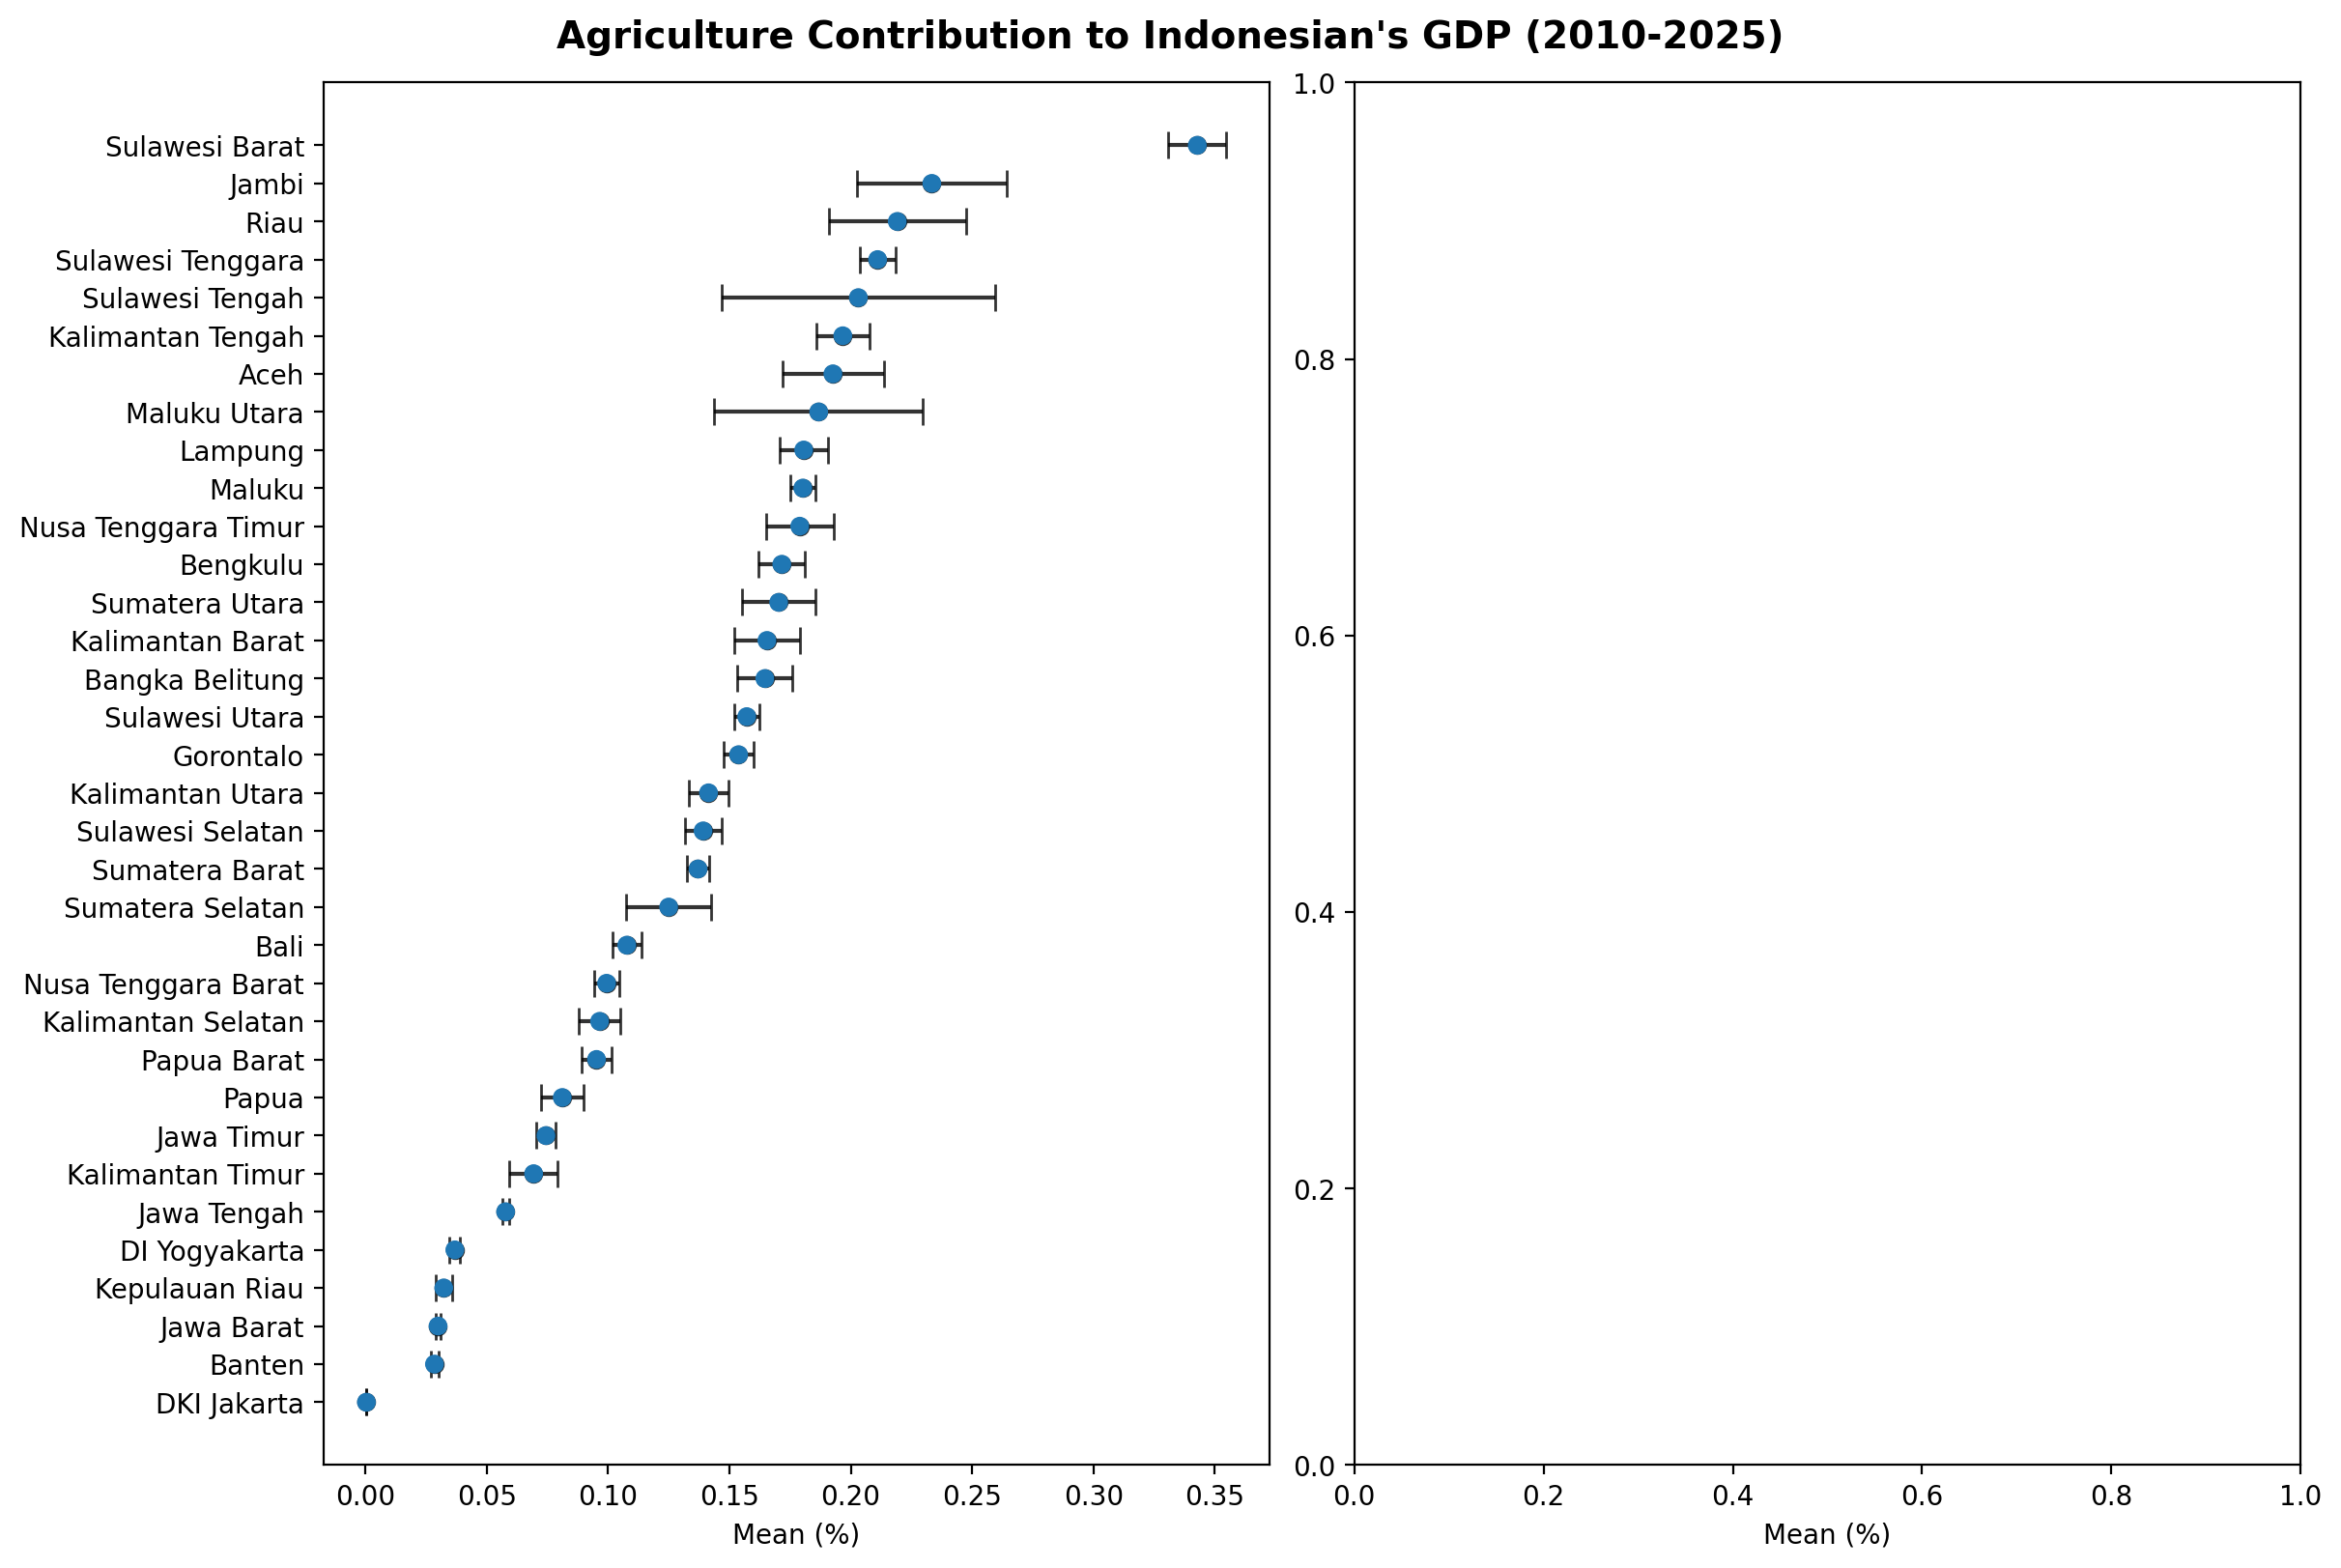

In [39]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=2, dpi=200, constrained_layout=True)

ax[0].scatter(x=data['Mean_AG%'], y=data['Province'], ls='')

# data.plot.scatter(y='Province', x='Mean', ax=ax, ls='')
ax[0].errorbar(y=data['Province'].values, x=data['Mean_AG%'].values, capsize=5,
            xerr=data['STD_AG%'].values, ls='', c='black', alpha=0.8, zorder=0,  fmt='o')


# ax[1].barh(y=data['Region'], width=data['Mean'])

ax[0].set_yticks(np.arange(34))
ax[0].set_yticklabels(data['Province'].values)
ax[0].set_ylabel('')
for i in range(2):
    ax[i].set_xlabel('Mean (%)')
fig.suptitle("Agriculture Contribution to Indonesian's GDP (2010-2025)", 
             fontweight='bold', fontsize=14)
plt.show()

In [42]:
S2 = gdp.copy()
S2['S2'] = normalization(S2, 'Mean_AG%')

## Sensitivity

In [59]:
region_map = {
    'Aceh': 'Sumatera',
    'Sumatera Utara': 'Sumatera',
    'Sumatera Barat': 'Sumatera',
    'Riau': 'Sumatera',
    'Kepulauan Riau': 'Sumatera',
    'Jambi': 'Sumatera',
    'Sumatera Selatan': 'Sumatera',
    'Bangka Belitung':'Sumatera',
    'Bengkulu': 'Sumatera',
    'Lampung': 'Sumatera',
    'DKI Jakarta':'Jawa',
    'Jawa Barat': 'Jawa',
    'Banten': 'Jawa',
    'Jawa Tengah': 'Jawa',
    'DI Yogyakarta': 'Jawa',
    'Jawa Timur': 'Jawa',
    'Bali': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Barat': 'Bali-Nusa Tenggara',
    'Nusa Tenggara Timur': 'Bali-Nusa Tenggara',
    'Kalimantan Barat': 'Kalimantan',
    'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan',
    'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Utara': 'Kalimantan',
    'Sulawesi Utara': 'Sulawesi',
    'Gorontalo': 'Sulawesi',
    'Sulawesi Tengah': 'Sulawesi',
    'Sulawesi Barat': 'Sulawesi',
    'Sulawesi Selatan': 'Sulawesi',
    'Sulawesi Tenggara': 'Sulawesi',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku',
    'Papua Barat': 'Papua',
    'Papua': 'Papua',
}



region_colors = {
    'Sumatera':'tab:orange',
    'Jawa':'tab:blue',
    'Kalimantan':'tab:green',
    'Sulawesi':'tab:red',
    'Bali-Nusa Tenggara':'tab:brown',
    'Maluku':'tab:cyan',
    'Papua':'tab:olive'
}

S = pd.merge(left=S1[['Province', 'S1']], right=S2[['Province', 'S2']], on='Province')\
    .merge(right=S3[['Province', 'S3']], on='Province')

In [60]:
S['Sensitivity'] = S[['S1', 'S2', 'S3']].mean(axis=1)
S['S'] = normalization(S, 'Sensitivity')

S = S.sort_values(by='S', ascending=True).reset_index(drop=True)

S['Region'] = S['Province'].apply(lambda x: region_map[x]
                                    if x in region_map.keys() else x)
S['Color'] = S['Region'].apply(lambda x: region_colors[x]
                                 if x in region_colors.keys() else 'k')

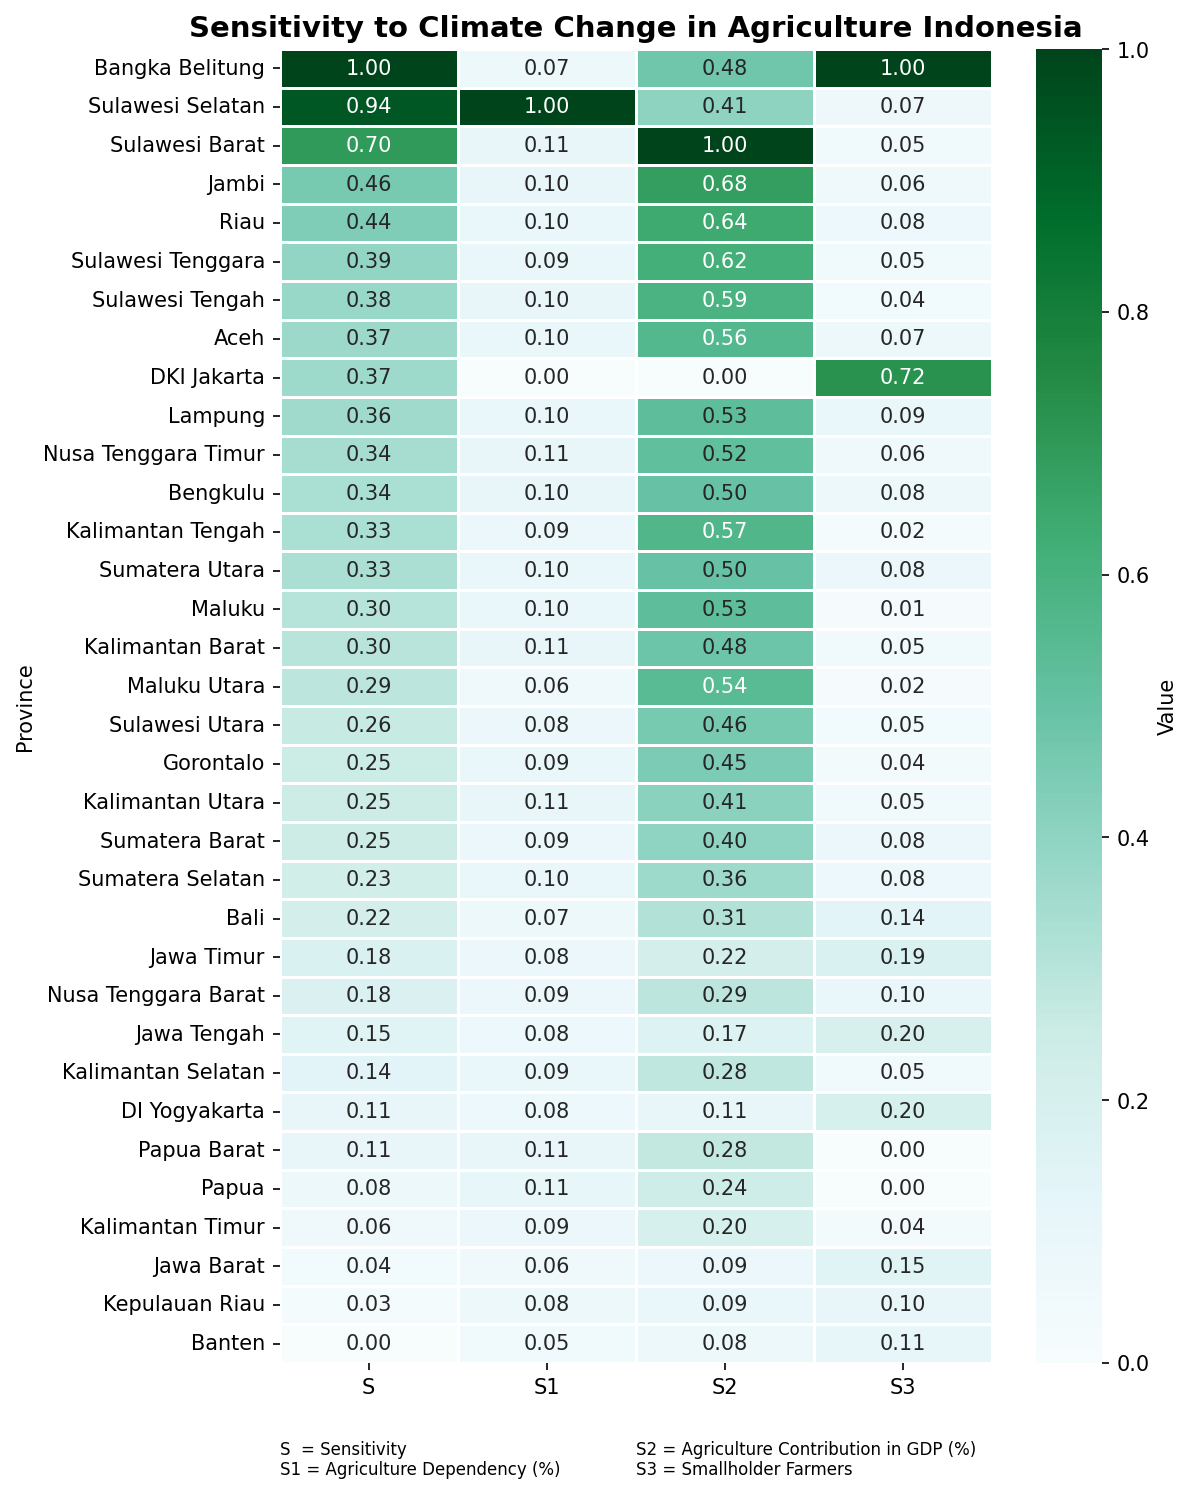

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
df_heatmap = S[['Province', 'S', 'S1', 'S2', 'S3']]
df_heatmap = df_heatmap.sort_values(by='S', ascending=False).set_index('Province')

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 10), dpi=150)
sns.heatmap(df_heatmap, 
            cmap="BuGn",          # colormap
            annot=True,           # show numbers in cells
            fmt=".2f",            # formatting for numbers
            linewidths=0.5,       # <-- space between cells
            linecolor="white",    # <-- color of the space
            cbar_kws={'label': 'Value'})  

ax.set_title("Sensitivity to Climate Change in Agriculture Indonesia", fontsize=14, fontweight='bold')

# add information on x-axis below the heatmap
# Left column
ax.text(0.0, 36,
        "S  = Sensitivity\n"
        "S1 = Agriculture Dependency (%)",
        ha='left', va='top', fontsize=8,
        transform=ax.transData)

# # Right column
ax.text(2, 36,   # adjust x offset to control spacing between columns
        "S2 = Agriculture Contribution in GDP (%)\n"
        "S3 = Smallholder Farmers",
        ha='left', va='top', fontsize=8,
        transform=ax.transData)

fig.tight_layout()
fig.savefig(r"result\Sensitivity.png", dpi=300, bbox_inches='tight')
plt.show()